In [37]:
import numpy as np

import matplotlib.pyplot as plt

# Linear Regression in Numpy

(1, 1) (100, 1)


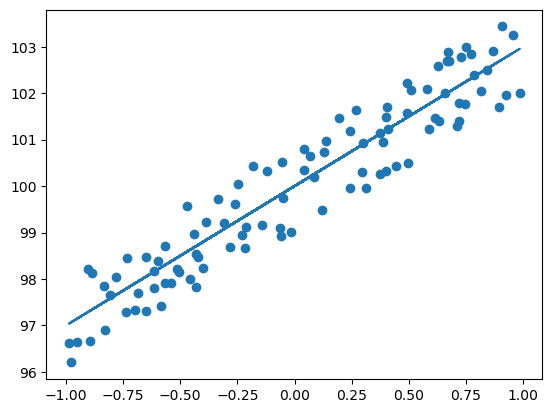

In [41]:
n, d = 100, 1 # linear regression
X = np.random.uniform(-1, 1, (n, d)) # (100, 1)
noise = np.random.uniform(-1, 1, (n, 1)) # (100, 1)

w_true, b_true = np.array([3]).reshape(-1, 1), np.array([100])
print(w_true.shape, X.shape)

y_true = X @ w_true + b_true + noise # (100, 1) = (100, 1) @ (1,1)
y_true_graph = X @ w_true + b_true

plt.scatter(X, y_true)
plt.plot(X, y_true_graph)

In [ ]:
class LinearModel: 

    def __init__(self, input_dim, output_dim):
        # n, p: (row of data, feature#)
        # project matrix input_dim -> output_dim (p, 1)
        self.weight = np.random.randn(input_dim, output_dim) * np.sqrt(2. / input_dim)
        self.bias = np.zeros(output_dim)

    def __call__(self, x):
        self.x = x
        return x @ self.weight + self.bias

    def backward(self, loss_grad):
        self.weight_grad = self.x.T @ loss_grad # (100, 1) @ (100, 1) = self.x @ loss_grad
        self.bias_grad = loss_grad.sum(axis=0) # 1 right and 0 down

    def step(self, lr):
        # key part
        self.weight = self.weight - lr * self.weight_grad
        self.bias = self.bias - lr * self.bias_grad
    

class Loss: 

    def __call__(self, y_true, y_pred):
        self.y_true, self.y_pred = y_true, y_pred
        mse = np.mean((y_true - y_pred)**2) # mse
        return mse

    def get_loss_grad(self):
        # key part
        """1/n * sum(   (y-pred)**2    ) where y_pred = Wx + b
        dl/dw = dl/dy_pred * dy_pred/dw = 2/n * (y - y_pred) * X = c * X
        dl/db = dl/dy_pred * dy_pred/db = 2/n * (y - y_pred) * 1 = c * 1
        here we just return 2/n * (y - y_pred), part and interaction with X
        part will be inside the LinearModel.backward()
        """
        n = self.y_true.shape[0]
        # remove n here see what will happen. answer: gradient exploding since too large
        # this term is for averaging the gradient for data in batch
        # otherwise it will overshoot the local minimal point. if n removed, you need to
        # increasing learning rate on the other side.
        return 2 / n * (self.y_pred - self.y_true) # c = - 2/n * (self.y_true - self.y_pred)

    
def one_epoch_train(i, X, y_true, model, loss):
    y_pred = model(X)
    loss_val = loss(y_true, y_pred)
    loss_grad = loss.get_loss_grad()
    print(f"loss: {loss_val}")
    if i % 10 == 0:
        plt.plot(X, y_pred)

    model.backward(loss_grad) # update total gradient
    model.step(0.02) # update parameters


def train_np(X, y_true, model, loss, n_epoch):
    for i in range(n_epoch):
        one_epoch_train(i, X, y_true, model, loss)

loss: 10004.021616415741
loss: 9219.199484352535
loss: 8495.949456234855
loss: 7829.440977059717
loss: 7215.222466478051
loss: 6649.191586849001
loss: 6127.567843874041
loss: 5646.867336811461
loss: 5203.879489628784
loss: 4795.645607681291
loss: 4419.439116697482
loss: 4072.74735208832
loss: 3753.2547769517073
loss: 3458.8275166858184
loss: 3187.4991069185307
loss: 2937.457359563851
loss: 2707.0322592842067
loss: 2494.6848095194837
loss: 2298.996753585833
loss: 2118.66110219183
loss: 1952.4734041055904
loss: 1799.3237016699343
loss: 1658.1891174367809
loss: 1528.127022407139
loss: 1408.268740247636
loss: 1297.8137454342425
loss: 1196.0243165728189
loss: 1102.2206091861897
loss: 1015.7761150590617
loss: 936.1134778139146
loss: 862.7006367702483
loss: 795.0472733321413
loss: 732.7015361696895
loss: 675.2470233219092
loss: 622.3000010646884
loss: 573.5068409686966
loss: 528.5416580294593
loss: 487.1041340947446
loss: 448.91751205201564
loss: 413.72674737920084
loss: 381.2968047130422
los

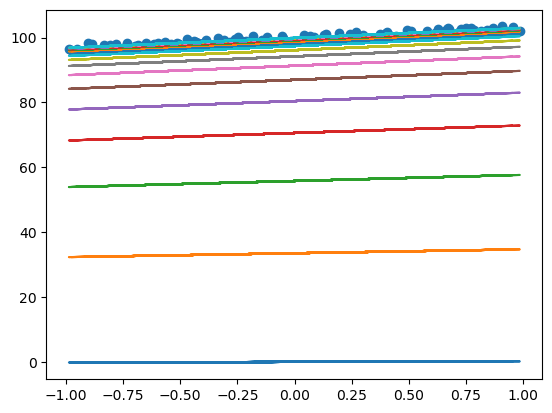

In [43]:
model = LinearModel(1, 1)
loss = Loss()

train_np(X, y_true, model, loss, 200)
plt.scatter(X, y_true)

In [44]:
# check the estimated weight and bias
print(model.bias)
print(model.weight)

[99.91375501]
[[3.06080376]]


# Multiple Linear Regression

(3, 1) (100, 3)
loss: 9970.575222427797
loss: 9188.229862667893
loss: 8467.384829238583
loss: 7803.20258079265
loss: 7191.226174635879
loss: 6627.349320305532
loss: 6107.788789478136
loss: 5629.058996797006
loss: 5187.948580799015
loss: 4781.498827561399
loss: 4406.983792072878
loss: 4061.8919837426033
loss: 3743.909492971758
loss: 3450.904445396994
loss: 3180.9126793371747
loss: 2932.124550195067
loss: 2702.872773139047
loss: 2491.62122236739
loss: 2296.954611686104
loss: 2117.568987053932
loss: 1952.262967204708
loss: 1799.9296734844916
loss: 1659.5492946725512
loss: 1530.1822368224925
loss: 1410.9628120912355
loss: 1301.0934241456746
loss: 1199.8392110738862
loss: 1106.5231098022846
loss: 1020.5213088526933
loss: 941.2590588829735
loss: 868.2068128592232
loss: 800.8766699227039
loss: 738.8190990555116
loss: 681.6199205292701
loss: 628.8975248534497
loss: 580.3003105359268
loss: 535.5043234388054
loss: 494.211081867271
loss: 456.1455727773462
loss: 421.054405638354
loss: 388.70411154

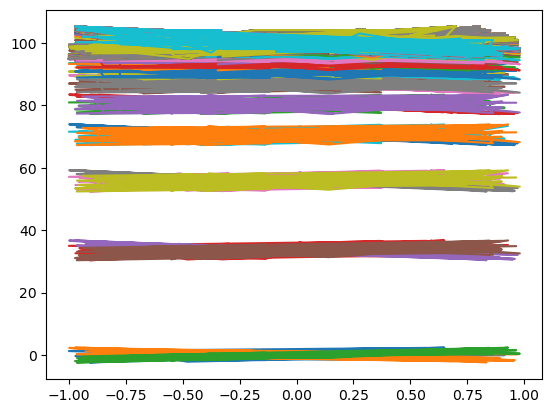

In [48]:
n, d = 100, 3 # multiple linear regression
X = np.random.uniform(-1, 1, (n, d)) # (100, 1)
noise = np.random.uniform(-1, 1, (n, 1)) # (100, 1)

w_true = np.array([3, 1.5, -2]).reshape(d, -1)
b_true = np.array([100])
print(w_true.shape, X.shape)

y_true = X @ w_true + b_true + noise # (100, 3) @ (3, 1) 

model = LinearModel(3, 1)
loss = Loss()

train_np(X, y_true, model, loss, 1000)

In [49]:
# check the estimated weight and bias
print(model.bias)
print(model.weight)

[99.96542015]
[[ 3.04504185]
 [ 1.45912862]
 [-1.86414744]]


# Linear Regression in Pytorch

In [19]:
import torch
import torch.nn as nn

In [ ]:
class LinearModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, X):
        out = self.linear(X)
        return out


def train_torch(X, y_true, model, optimizer, loss, n_epoch):
    X = torch.Tensor(X)
    y_true = torch.Tensor(y_true)
    for epoch in range(n_epoch):
        optimizer.zero_grad()

        y_pred = model(X)
        loss_ = loss(y_pred, y_true)
        if epoch % 10 == 0:
            print(f"epoch: {epoch}, loss: {loss_}")

        # with no torch.grad():
        # when do inference or validation inference, we dont need
        # gradient calculation. Turn it off to improve memory and performance
        
        loss_.backward()
        optimizer.step()
    


n, d = 100, 3 # multiple linear regression
X = np.random.uniform(-1, 1, (n, d)) # (100, 1)
noise = np.random.uniform(-1, 1, (n, 1)) # (100, 1)

w_true = np.array([3, 1.5, -2]).reshape(d, -1)
b_true = np.array([100])
print(w_true.shape, X.shape)

y_true = X @ w_true + b_true + noise # (100, 3) @ (3, 1) 


torch_model = LinearModel(3, 1)
loss = torch.nn.MSELoss()
n_epoch = 1000
optimizer = torch.optim.SGD(torch_model.parameters(), lr=0.01)
train_torch(X, y_true, torch_model, optimizer, loss, n_epoch)



(3, 1) (100, 3)
epoch: 0, loss: 9960.2998046875
epoch: 10, loss: 6617.52392578125
epoch: 20, loss: 4399.095703125
epoch: 30, loss: 2926.52587890625
epoch: 40, loss: 1948.775634765625
epoch: 50, loss: 1299.336181640625
epoch: 60, loss: 867.7597045898438
epoch: 70, loss: 580.7816162109375
epoch: 80, loss: 389.7974853515625
epoch: 90, loss: 262.56207275390625
epoch: 100, loss: 177.67843627929688
epoch: 110, loss: 120.94673919677734
epoch: 120, loss: 82.94143676757812
epoch: 130, loss: 57.404422760009766
epoch: 140, loss: 40.1789665222168
epoch: 150, loss: 28.50275421142578
epoch: 160, loss: 20.539087295532227
epoch: 170, loss: 15.065960884094238
epoch: 180, loss: 11.268838882446289
epoch: 190, loss: 8.604787826538086
epoch: 200, loss: 6.7108001708984375
epoch: 210, loss: 5.3437395095825195
epoch: 220, loss: 4.340279579162598
epoch: 230, loss: 3.5902833938598633
epoch: 240, loss: 3.0191848278045654
epoch: 250, loss: 2.5760915279388428
epoch: 260, loss: 2.2260518074035645
epoch: 270, loss: 

In [52]:
parameters = torch_model.parameters()
for param in parameters:
    print(param)

Parameter containing:
tensor([[ 3.0563,  1.3895, -2.0647]], requires_grad=True)
Parameter containing:
tensor([99.8749], requires_grad=True)


# Lasso & Ridge Regression

## Mean Squared Error (MSE) Loss with L1 and L2 Regularization

The MSE loss with L1 and L2 regularization is given by:

$$
L = \frac{1}{2m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)^2 + \lambda_1 \sum_{j} \left| w_j \right| + \frac{\lambda_2}{2} \sum_{j} w_j^2
$$

Here:
- $m$ is the number of data points.
- $y_i$ is the true label, and $\hat{y}_i$ is the prediction.
- $\lambda_1$ and $\lambda_2$ are the L1 and L2 regularization coefficients, respectively.

# Gradient of Loss with Respect to Weights and Bias

To compute the gradients step by step:

## 1. Compute the gradient of the MSE loss without regularization

Let $y_i = w^T x_i + b$ be the predicted value. The gradient of the loss with respect to $w$ and $b$ is:

$$
\frac{\partial L_{\text{MSE}}}{\partial w} = -\frac{1}{m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right) x_i
$$

$$
\frac{\partial L_{\text{MSE}}}{\partial b} = -\frac{1}{m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)
$$

## 2. Add the L1 regularization gradient

The gradient of the L1 regularization term with respect to $w$ is:

$$
\frac{\partial \lambda_1 \sum_{j} \left| w_j \right|}{\partial w_j} = \lambda_1 \cdot \text{sign}(w_j)
$$

## 3. Add the L2 regularization gradient

The gradient of the L2 regularization term with respect to $w$ is:

$$
\frac{\partial \frac{\lambda_2}{2} \sum_{j} w_j^2}{\partial w_j} = \lambda_2 w_j
$$

## 4. Combine the gradients

The total gradient with respect to $w$ is:

$$
\frac{\partial L}{\partial w} = -\frac{1}{m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right) x_i + \lambda_1 \cdot \text{sign}(w) + \lambda_2 w
$$

The total gradient with respect to $b$ is:

$$
\frac{\partial L}{\partial b} = -\frac{1}{m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)
$$


# Intuition on Why L1 and L2 regularization can reduce overfitting?
- Introducing a penalty to the sum of the weights means that the model has to “distribute” its weights optimally, so naturally most of this “resource” will go to the simple features that explain most of the variance, with complex features getting small or zero weights.

In [ ]:
class LassoLinearModel: 

    def __init__(self, input_dim, output_dim):
        # n, p: (row of data, feature#)
        # project matrix input_dim -> output_dim (p, 1)
        # we initialize weight by sampling from normal distribution since
        # Max Likelihood + normal distribution = linear regression: 
        self.weight = np.random.randn(input_dim, output_dim) * np.sqrt(2. / input_dim)
        self.bias = np.zeros(output_dim)

    def __call__(self, x):
        self.x = x
        return x @ self.weight + self.bias

    def backward(self, loss_grad):
        # 2/n * (y - y_pred) * X = c * X
        # 2/n * (y - y_pred) * 1 = c * 1
        self.weight_grad = self.x.T @ loss_grad # (100, 1) @ (100, 1) = self.x @ loss_grad
        self.bias_grad = loss_grad.sum(axis=0) # axis=1 right and axis=0 down

    def step(self, lr):
        # key part
        self.weight = self.weight - lr * self.weight_grad
        self.bias = self.bias - lr * self.bias_grad
    

class Loss: 

    def __call__(self, y_true, y_pred):
        self.y_true, self.y_pred = y_true, y_pred
        mse = np.mean((y_true - y_pred)**2) # mse
        return mse

    def get_loss_grad(self):
        # key part
        """1/n * sum(   (y-pred)**2    ) where y_pred = Wx + b
        dl/dw = dl/dy_pred * dy_pred/dw = 2/n * (y - y_pred) * X = c * X
        dl/db = dl/dy_pred * dy_pred/db = 2/n * (y - y_pred) * 1 = c * 1
        here we just return 2/n * (y - y_pred), part and interaction with X
        part will be inside the LinearModel.backward()
        """
        n = self.y_true.shape[0]
        # remove n here see what will happen. answer: gradient exploding since too large
        # this term is for averaging the gradient for data in batch
        # otherwise it will overshoot the local minimal point. if n removed, you need to
        # increasing learning rate on the other side.
        # notice for softmax/linear regression, the loss grad is the same thing here and this is not a coincidence
        return 2 / n * (self.y_pred - self.y_true) # c = - 2/n * (self.y_true - self.y_pred)

    
def one_epoch_train(i, X, y_true, model, loss):
    y_pred = model(X)
    loss_val = loss(y_true, y_pred)
    loss_grad = loss.get_loss_grad()
    print(f"loss: {loss_val}")
    if i % 10 == 0:
        plt.plot(X, y_pred)

    model.backward(loss_grad) # update total gradient
    model.step(0.02) # update parameters


def train(X, y_true, model, loss, n_epoch):
    for i in range(n_epoch):
        one_epoch_train(i, X, y_true, model, loss)